# Mini Project

## 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand



### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기

### 2. 데이터 시각화 
4종류 이상의 시각화 기법을 사용하여 그래프 그리기
Seaborn 라이브러리 활용

### 3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

### 4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

In [66]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
# 읽어드릴 파일 경로 : /dataset/bike_sharing_demand_train.csv
filepath = "./dataset/bike_sharing_demand_train.csv"
data = pd.read_csv(filepath)

In [68]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [69]:
data['tempDate'] = data.datetime.apply(lambda x:x.split())

In [70]:
data['year'] = data.tempDate.apply(lambda x:x[0].split('-')[0])
data['month'] = data.tempDate.apply(lambda x:x[0].split('-')[1])
data['day'] = data.tempDate.apply(lambda x:x[0].split('-')[2])

In [71]:
import calendar
from datetime import datetime
data['weekday'] = data.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
data['hour'] = data.tempDate.apply(lambda x:x[1].split(':')[0])

In [72]:
data = data.drop('tempDate', axis=1)

In [73]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01,Saturday,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,Saturday,01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01,Saturday,02
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01,Saturday,03
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01,Saturday,04


In [74]:
def showInfo2(feature):
    null = data[feature].isnull().sum()
    print('{}의 결측치의 개수: {}'.format(feature, null))
    unique = data[feature].unique()
    print('{}의 값: {}'.format(feature, unique))

In [75]:
data['year'].unique()

array(['2011', '2012'], dtype=object)

In [76]:
# 결측치 확인. 
colname = ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'weekday', 'hour']

for i in colname:
    showInfo2(i)

datetime의 결측치의 개수: 0
datetime의 값: ['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']
season의 결측치의 개수: 0
season의 값: [1 2 3 4]
holiday의 결측치의 개수: 0
holiday의 값: [0 1]
workingday의 결측치의 개수: 0
workingday의 값: [0 1]
weather의 결측치의 개수: 0
weather의 값: [1 2 3 4]
temp의 결측치의 개수: 0
temp의 값: [ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]
atemp의 결측치의 개수: 0
atemp의 값: [14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15

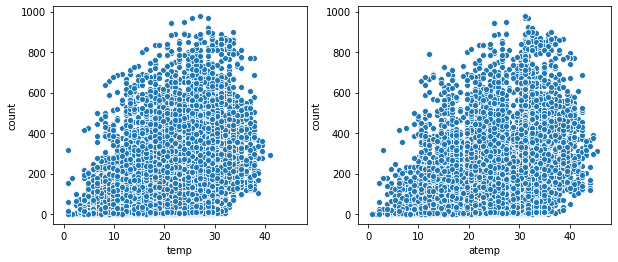

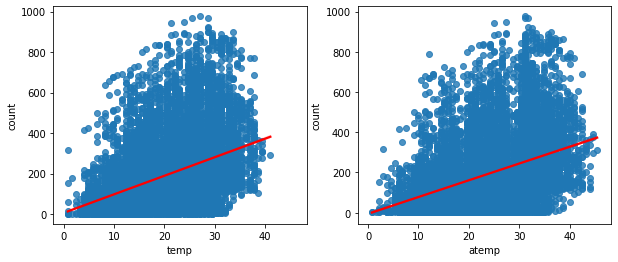

In [77]:
# 온도와 대여량 간의 상관관계 
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.scatterplot(x='temp', y = 'count', data=data, ax = axes[0])
sns.scatterplot(x='atemp', y = 'count', data=data, ax = axes[1])
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.regplot(x='temp', y = 'count', data=data, line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(x='atemp', y = 'count', data=data, line_kws={'color': 'red'}, ax=axes[1])

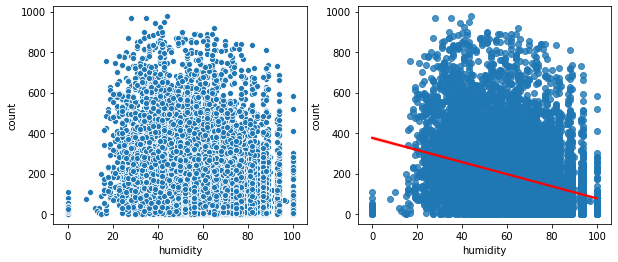

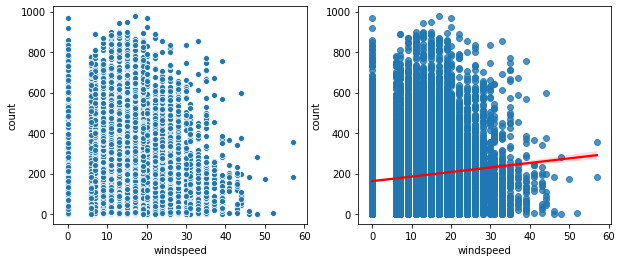

In [13]:
# 온도와 대여량 간의 상관관계 
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.scatterplot(x='humidity', y = 'count', data=data, ax = axes[0])
sns.regplot(x='humidity', y = 'count', data=data, line_kws={'color': 'red'}, ax = axes[1])
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.scatterplot(x='windspeed', y = 'count', data=data,  ax=axes[0])
sns.regplot(x='windspeed', y = 'count', data=data, line_kws={'color': 'red'}, ax=axes[1])

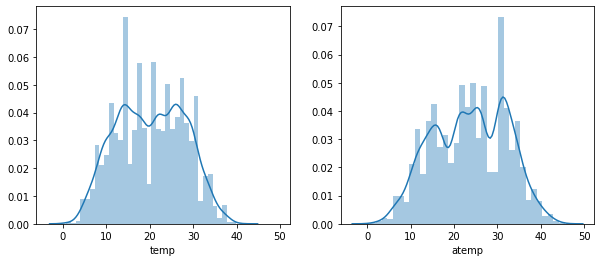

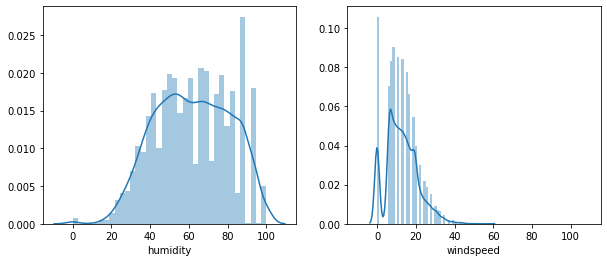

In [81]:
# 온도와 대여량 간의 상관관계 
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot(data.temp, ax = axes[0])
sns.distplot(data.atemp, ax = axes[1])
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.distplot(data.humidity, ax = axes[0])
sns.distplot(data.windspeed, ax = axes[1])


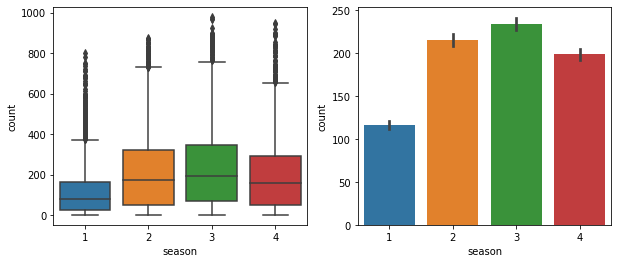

In [14]:
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.boxplot(x = 'season', y='count', data=data, ax = axes[0])
sns.barplot(x='season', y='count', data=data, ax = axes[1])

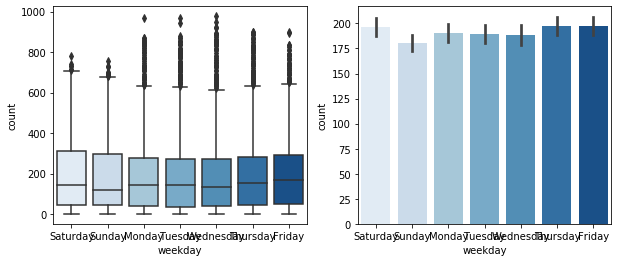

In [15]:
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.boxplot(x = 'weekday', y='count', data=data, ax = axes[0], palette="Blues")
sns.barplot(x='weekday', y='count', data=data, ax = axes[1], palette="Blues")

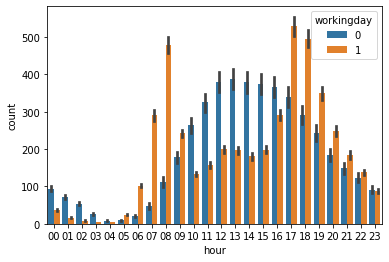

In [16]:
# 주로 출퇴근 시간대에 많이 타는 것 같다. 
# 그 증거로, 쉬는 날에는 출퇴근 시간대에 사용량이 급격히 줄어듬. 
# 자전거를 출퇴근 용으로 사용하는 사람들이 많다. 
sns.barplot(x = 'hour', y='count', data=data, hue = 'workingday')


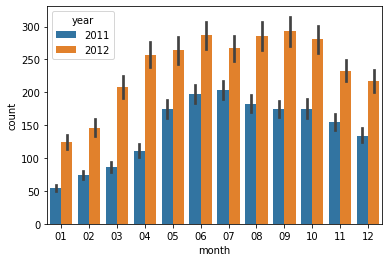

In [17]:
# 전체적으로 11년 보다 사용량이 늘었다. 
sns.barplot(x = 'month', y = 'count', data = data, hue='year')

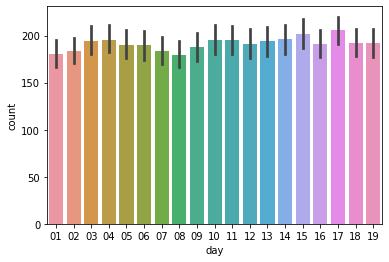

In [18]:
# 그닥 의미가 없음 
sns.barplot(x = 'day', y = 'count', data = data)

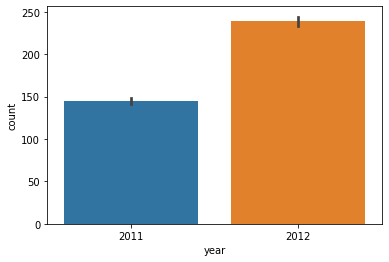

In [19]:
sns.barplot(x = 'year', y = 'count', data = data)

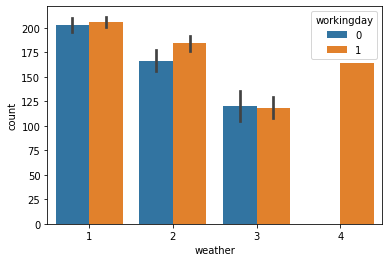

In [20]:
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
sns.barplot(x = 'weather', y = 'count', data = data, hue = 'workingday')

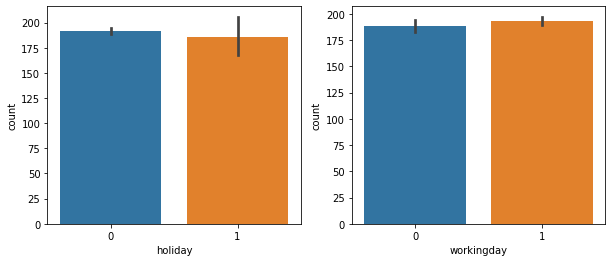

In [21]:
# holiday, workday 상관없이 사용량 자체는 비슷하다. 
f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
sns.barplot(x = 'holiday', y = 'count', data = data, ax = axes[0])
sns.barplot(x = 'workingday', y = 'count', data=data, ax = axes[1])

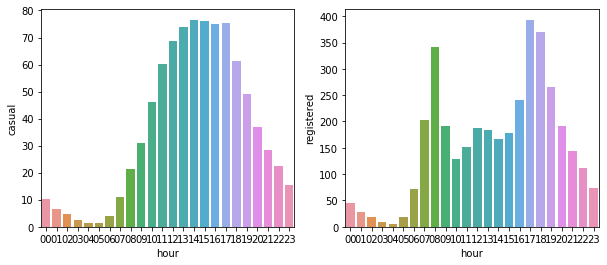

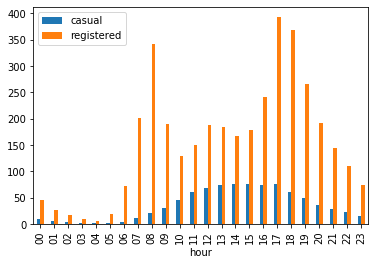

In [22]:
# 출퇴근 시간대에는 회원들이 주로 사용하고, 그외 시간에는 캐주얼 이용자가 주로 사용한다. 

f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

grouped = data['casual'].groupby(data['hour'])
casual_by_hour = pd.DataFrame(grouped.mean())
grouped2 = data['registered'].groupby(data['hour'])
registered_by_hour = pd.DataFrame(grouped2.mean())

sns.barplot(x = casual_by_hour.index, y = 'casual', data= casual_by_hour, ax = axes[0])
sns.barplot(x = registered_by_hour.index, y = 'registered', data= registered_by_hour, ax = axes[1])

df = pd.merge(casual_by_hour, registered_by_hour, on = 'hour')

df[['casual', 'registered']].plot(kind='bar')

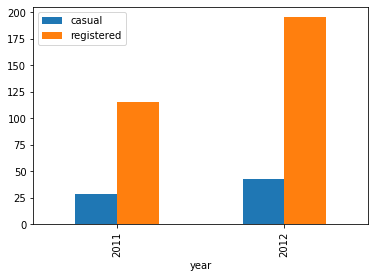

In [23]:


grouped = data['casual'].groupby(data['year'])
casual_by_hour = pd.DataFrame(grouped.mean())
grouped2 = data['registered'].groupby(data['year'])
registered_by_hour = pd.DataFrame(grouped2.mean())

df = pd.merge(casual_by_hour, registered_by_hour, on = 'year')

df[['casual', 'registered']].plot(kind='bar')

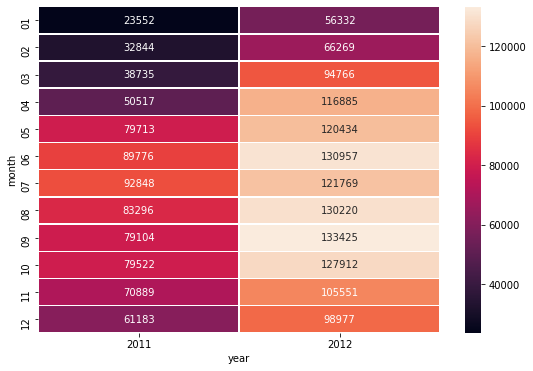

In [59]:
# heatmap 
data['temp'] = data['year'] + '-' + data['month']
heatmap = pd.DataFrame(data['count'].groupby(data['temp']).sum())

heatmap['temp'] = heatmap.index

heatmap['year'] = heatmap.temp.apply(lambda x: x.split('-')[0])
heatmap['month'] = heatmap.temp.apply(lambda x: x.split('-')[1])
heatmap = heatmap.drop('temp', axis =1)
heatmap.head()
h= heatmap.pivot("month", "year", "count")
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(h, annot=True, fmt="d", linewidths=.5, ax=ax)